# Risk game

For simpler attacks, it is possible to deterministically determine the probability of winning through a combination of Markov Chains and casework counting.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from Modules.MarkovChain import TransitionMatrix

STATES = "states.txt"
TRANSITION_MATRIX = "transition_matrix.npy"
FILENAME = "winning_probabilites.npy"

/Users/pontushovberger/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Attack with $\le 3$ attackers and $\le 2$ defenders

## Casework counting

### 1 attacker, 1 defender

With one attacker and one defender the probability of the attacker winning can be explicitly calculated. For a 6-sided equal probability dice there are 36 different combinations of throwing two dices, all with equal probability since the outcome of the two different dices are independent. We can calculate the probability of winning by considering all possible outcomes

\begin{matrix}
  & 1 & 2 & 3 & 4 & 5 & 6 \\
1 & L & L & L & L & L & L \\
2 & W & L & L & L & L & L \\
3 & W & W & L & L & L & L \\
4 & W & W & W & L & L & L \\
5 & W & W & W & W & L & L \\
6 & W & W & W & W & W & L \\
\end{matrix}

The vertical axis is the dice rolled by attacker, and horisontal axis that of the defender. _'W'_ denotes the attacker winning and _'L'_ that the attacker looses.

$$
P(W) = \frac{\text{Number of W}}{\text{Number of combinations}} = \frac{15}{36} \approx 41.67\%
$$

## Markov Chain

The theoretical probability of winning with more than one defender can be computed using a Markov Chain. The states are unique combinations of a number of attacking and defending troops, denoted as $(a,d)$, where $a$ is number of attacking troops and $d$ number of defending troops.

The two states $(1,0)$ and $(0,1)$ (i.e. attacker/defender only have one troop left with the opponent having no troops left) are absorbing states meaning that once entered they have probability $1$ of staying in that state the next step. The transition matrix therefore becomes:

\begin{matrix}
      & (1,0) & (0,1) \\
(1,0) & 1     & 0     \\
(0,1) & 0     & 1     \\
\end{matrix}

We have also counted the probability of winning with one defender & one attacker (i.e. the state $(1,1)$ to $41.67\%$ meaning that the transition probability to $(1,0)$ being $0.4167$ and to $(0,1)$ to $1-0.4167 = 0.5833$. So the transition matrix becomes:

\begin{matrix}
      & (1,1) & (1,0) & (0,1)   \\
(1,1) & 0     & 0.4167 & 0.5833 \\
(1,0) & 0     & 1     & 0       \\
(0,1) & 0     & 0     & 1       \\
\end{matrix}

Implementing this using the TransitionMatrix-class

In [2]:
transition_matrix = TransitionMatrix(3, [[1,1], [1,0], [0,1]])
transition_matrix.update_transition_prob([1,1], [1,0], 0.4167)
transition_matrix.update_transition_prob([1,1], [0,1], 0.5833)
transition_matrix.update_transition_prob([1,0], [1,0], 1)
transition_matrix.update_transition_prob([0,1], [0,1], 1)
print(transition_matrix)

         [1, 1] [1, 0] [0, 1]
        ---------------------
[1, 1] | 0.0000 0.4167 0.5833
[1, 0] | 0.0000 1.0000 0.0000
[0, 1] | 0.0000 0.0000 1.0000



### 2 attackers, 1 defender

For two attacker and one defender we can still determine the probability by casework counting (list every single possible case). This is a bit more difficult to do by hand since there are $6^3$ different combinations. By iterating through all combinations and count number of wins we can calculate the probability.

In [3]:
combinations = 0
wins = 0

# Iterate through all combinations and calculate probability of winning
for a1 in range(1,7):
    for a2 in range(1,7):
        for d in range(1,7):
            combinations += 1
            if max(a1,a2) > d:
                wins += 1

print("Probability of winning {:.2%}".format(wins/combinations))

Probability of winning 57.87%


Here a1 is the first dice of the attacker, a2 the second dice of the attacker and d the dice of the defender.

If the attacker wins, it will transition to the state $(2,0)$ and loosing means attacker will lose one troop (i.e. it will transition to $(1,1)$. Mathematically:
- $\mathbb{P}[(2,1) \rightarrow (2,0)] = 0.5787$
- $\mathbb{P}[(2,1) \rightarrow (1,1)] = 1 - 0.5787 = 0.4213$
- $\mathbb{P}[(2,0) \rightarrow (2,0)] = 1$

In [4]:
transition_matrix.add_state([2,1])
transition_matrix.add_state([2,0])
transition_matrix.update_transition_prob([2,1], [2,0], 0.5787)
transition_matrix.update_transition_prob([2,1], [1,1], 0.4213)
transition_matrix.update_transition_prob([2,0], [2,0], 1)
print(transition_matrix)

         [1, 1] [1, 0] [0, 1] [2, 1] [2, 0]
        -----------------------------------
[1, 1] | 0.0000 0.4167 0.5833 0.0000 0.0000
[1, 0] | 0.0000 1.0000 0.0000 0.0000 0.0000
[0, 1] | 0.0000 0.0000 1.0000 0.0000 0.0000
[2, 1] | 0.4213 0.0000 0.0000 0.0000 0.5787
[2, 0] | 0.0000 0.0000 0.0000 0.0000 1.0000



### 3 attackers, 1 defender

In [5]:
combinations = 0
wins = 0

# Iterate through all combinations and calculate probability of winning
for a1 in range(1,7):
    for a2 in range(1,7):
        for a3 in range(1,7):
            for d in range(1,7):
                combinations += 1
                if max(a1,a2,a3) > d:
                    wins += 1

print("Probability of winning {:.2%}".format(wins/combinations))

Probability of winning 65.97%


We now introduce states $(3,1)$ and $(3,0)$, with:
- $\mathbb{P}[(3,1) \rightarrow (3,0)] = 0.6597$
- $\mathbb{P}[(3,1) \rightarrow (2,1)] = 1 - 0.6597 = 0.3403$
- $\mathbb{P}[(3,0) \rightarrow (3,0)] = 1$

In [6]:
transition_matrix.add_state([3,1])
transition_matrix.add_state([3,0])
transition_matrix.update_transition_prob([3,1], [3,0], 0.6597)
transition_matrix.update_transition_prob([3,1], [2,1], 0.3403)
transition_matrix.update_transition_prob([3,0], [3,0], 1)
print(transition_matrix)

         [1, 1] [1, 0] [0, 1] [2, 1] [2, 0] [3, 1] [3, 0]
        -------------------------------------------------
[1, 1] | 0.0000 0.4167 0.5833 0.0000 0.0000 0.0000 0.0000
[1, 0] | 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[0, 1] | 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000
[2, 1] | 0.4213 0.0000 0.0000 0.0000 0.5787 0.0000 0.0000
[2, 0] | 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000
[3, 1] | 0.0000 0.0000 0.0000 0.3403 0.0000 0.0000 0.6597
[3, 0] | 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000



### 1 attacker, 2 defenders

In [7]:
combinations = 0
attacker_one_lost = 0
defender_one_lost = 0

# Iterate through all combinations and calculate probability of winning
for a1 in range(1,7):
    for d1 in range(1,7):
        for d2 in range(1,7):
            combinations += 1
            if a1 > max(d1, d2):
                defender_one_lost += 1
            else:
                attacker_one_lost += 1

print("Probability of defender loosing one troop {:.2%}".format(defender_one_lost/combinations))
print("Probability of attacker loosing one troop {:.2%}".format(attacker_one_lost/combinations))

transition_matrix.add_state([1,2])
transition_matrix.add_state([0,2])
transition_matrix.update_transition_prob([1,2], [1,1], round(defender_one_lost/combinations, 4))
transition_matrix.update_transition_prob([1,2], [0,2], round(attacker_one_lost/combinations, 4))
transition_matrix.update_transition_prob([0,2], [0,2], 1)

Probability of defender loosing one troop 25.46%
Probability of attacker loosing one troop 74.54%


### 2 attackers, 2 defenders

In [8]:
combinations = 0
attacker_two_lost = 0
defender_two_lost = 0
both_one_lost = 0

# Iterate through all combinations and calculate probability of winning
for a1 in range(1,7):
    for a2 in range(1,7):
        for d1 in range(1,7):
            for d2 in range(1,7):
                combinations += 1
                
                if sorted([a1,a2])[-1] > sorted([d1,d2])[-1]:
                    if sorted([a1,a2])[-2] > sorted([d1,d2])[-2]:
                        defender_two_lost += 1
                    else:
                        both_one_lost += 1
                else:
                    if sorted([a1,a2])[-2] > sorted([d1,d2])[-2]:
                        both_one_lost += 1
                    else:
                        attacker_two_lost += 1

print("Probability of attacker loosing two troops {:.2%}".format(attacker_two_lost/combinations))
print("Probability of defender loosing two troops {:.2%}".format(defender_two_lost/combinations))
print("Probability of both loosing one troop {:.2%}".format(both_one_lost/combinations))

transition_matrix.add_state([2,2])
transition_matrix.update_transition_prob([2,2], [0,2], round(attacker_two_lost/combinations, 4))
transition_matrix.update_transition_prob([2,2], [2,0], round(defender_two_lost/combinations, 4))
transition_matrix.update_transition_prob([2,2], [1,1], round(both_one_lost/combinations, 4))

Probability of attacker loosing two troops 44.83%
Probability of defender loosing two troops 22.76%
Probability of both loosing one troop 32.41%


Or equivalently:
- $\mathbb{P}[(2,2) \rightarrow (0,2)] = 0.4483$
- $\mathbb{P}[(2,2) \rightarrow (2,0)] = 0.2276$
- $\mathbb{P}[(2,2) \rightarrow (1,1)] = 0.3241$

### 3 attackers, 2 defenders

In [9]:
combinations = 0
attacker_two_lost = 0
defender_two_lost = 0
both_one_lost = 0

# Iterate through all combinations and calculate probability of winning
for a1 in range(1,7):
    for a2 in range(1,7):
        for a3 in range(1,7):
            for d1 in range(1,7):
                for d2 in range(1,7):
                    combinations += 1

                    if sorted([a1,a2,a3])[-1] > sorted([d1,d2])[-1]:
                        if sorted([a1,a2,a3])[-2] > sorted([d1,d2])[-2]:
                            defender_two_lost += 1
                        else:
                            both_one_lost += 1
                    else:
                        if sorted([a1,a2,a3])[-2] > sorted([d1,d2])[-2]:
                            both_one_lost += 1
                        else:
                            attacker_two_lost += 1

print("Probability of attacker loosing two troops {:.2%}".format(attacker_two_lost/combinations))
print("Probability of defender loosing two troops {:.2%}".format(defender_two_lost/combinations))
print("Probability of both loosing one troop {:.2%}".format(both_one_lost/combinations))

transition_matrix.add_state([3,2])
transition_matrix.update_transition_prob([3,2], [1,2], round(attacker_two_lost/combinations, 4))
transition_matrix.update_transition_prob([3,2], [3,0], round(defender_two_lost/combinations, 4))
transition_matrix.update_transition_prob([3,2], [2,1], round(both_one_lost/combinations, 4))

Probability of attacker loosing two troops 29.26%
Probability of defender loosing two troops 37.17%
Probability of both loosing one troop 33.58%


The transition matrix for all attacks with $\le 3$ attackers and $\le 2$ defenders is therefore:

In [10]:
print(transition_matrix)

         [1, 1] [1, 0] [0, 1] [2, 1] [2, 0] [3, 1] [3, 0] [1, 2] [0, 2] [2, 2] [3, 2]
        -----------------------------------------------------------------------------
[1, 1] | 0.0000 0.4167 0.5833 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[1, 0] | 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[0, 1] | 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[2, 1] | 0.4213 0.0000 0.0000 0.0000 0.5787 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[2, 0] | 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[3, 1] | 0.0000 0.0000 0.0000 0.3403 0.0000 0.0000 0.6597 0.0000 0.0000 0.0000 0.0000
[3, 0] | 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000
[1, 2] | 0.2546 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.7454 0.0000 0.0000
[0, 2] | 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000
[2, 2] | 0.3241 0.0000 0.0000 0.0000 0.2276 0.0000 0.0

# Attack with $>3$ attackers and/or $>2$ defenders

Since a player can't deploy more than 3 attackers or 2 defender, if either player has more troops they are restricted to one of the attacks above. We consider all cases where this can happen and what the corresponding attack would be (using the $(a,d)$-notation where $a$ is the number of attackers and $d$ the number of defenders:
- $(\ge3, \ge2) \Rightarrow (3, 2)$
- $(>3, 1) \Rightarrow (3, 1)$
- $(>3, 0) \Rightarrow (3, 0)$
- $(2, >2) \Rightarrow (2, 2)$
- $(1, >2) \Rightarrow (1, 2)$
- $(0, >2) \Rightarrow (0, 2)$

These rules are implemented in TransitionMatrix.calculate_transition_prob([a,d]). Using this, we can calculate the transition matrix for all combination of troops up until 30 attackers and 30 defenders.

In [11]:
maximum_no_troops = 30

for a in range(maximum_no_troops+1):
    for d in range(maximum_no_troops+1):
        transition_matrix.calculate_transition_prob([a, d])

# Save transition matrix
with open(TRANSITION_MATRIX, 'wb') as f:
    np.save(f, transition_matrix.transition_prob)

# Save states
with open(STATES, 'w') as f:
    for item in transition_matrix.states:
        f.write(f"{item}\n")

With this we can calculate the probability of winning from all states

In [12]:
winning_probabilites = np.zeros((maximum_no_troops+1, maximum_no_troops+1))
for a in range(maximum_no_troops+1):
    for d in range(maximum_no_troops+1):
        if a == 0 and d == 0:
            winning_probabilites[a][d] = 0
        else:
            prob_winning, end_states = transition_matrix.find_stationary_distribution([a, d])
            winning_probabilites[a][d] = round(prob_winning, 4)

# Save file
with open(FILENAME, 'wb') as f:
    np.save(f, winning_probabilites)

Which results in:

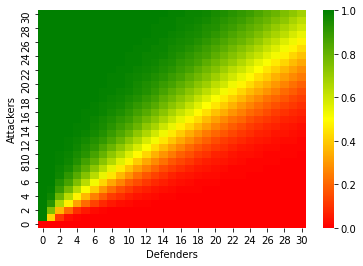

In [13]:
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['red', 'yellow', 'green'])
sns.heatmap(data=np.round(winning_probabilites, 2), cmap=cmap, cbar=True)
plt.xlabel("Defenders")
plt.ylabel("Attackers")
plt.ylim(reversed(plt.ylim()))
plt.show()

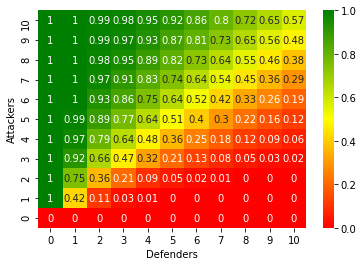

In [14]:
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['red', 'yellow', 'green'])
sns.heatmap(data=np.round(winning_probabilites[:11, :11], 2), annot=True, cmap=cmap, cbar=True)
plt.xlabel("Defenders")
plt.ylabel("Attackers")
plt.ylim(reversed(plt.ylim()))
plt.show()